In [1]:
import numpy as np   
import matplotlib.pyplot as plot
import pyclouds

%matplotlib inline

In [2]:
pyclouds.__version__

'v0.2.0+1.gee1eeb6.dirty'

In [3]:
from pyclouds.models import parcel as parcel_models, microphysics as microphysics_models
from pyclouds.reference.atmos import stratification_profiles
from pyclouds.reference import constants as reference_constants
from pyclouds import Var

# Dry parcel model

In [4]:
# Ambient state
ambient_stratification = stratification_profiles.Soong1973Dry()

In [5]:
z_points = np.linspace(100., 4e3, 500)
T_e = lambda z: ambient_stratification.temp(z)

z0 = z_points[0]
w0 = 0.1
T0 = T_e(z0) + 0.2
p0 = ambient_stratification.p(z0)

initial_condition = Var.make_state(r=500.0, w=w0, T=T0, p=p0)

In [6]:
cloud_model = parcel_models.DryAirOnly(
    environment=ambient_stratification, constants=reference_constants.default_constants,
    C_D=2.
)

profile = cloud_model.integrate(initial_condition, z_points)

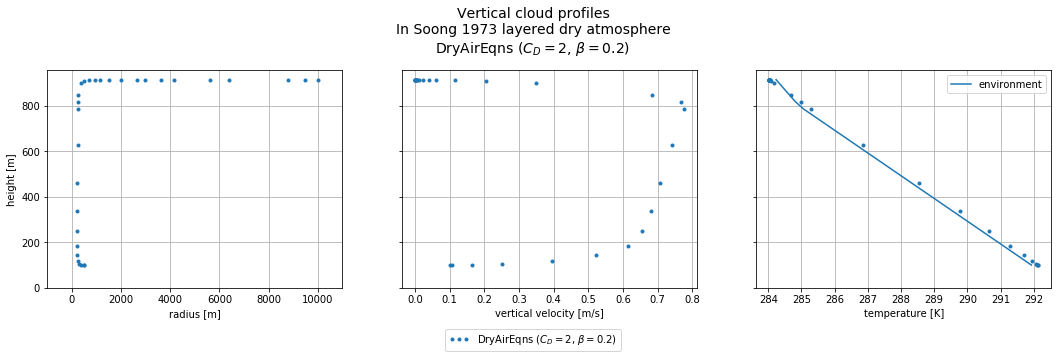

In [7]:
plot = profile.plot(variables=["r", "w", "T"])

# Full thermodynamic equations with finite cond. time microphysics

In [8]:
ambient_stratification = stratification_profiles.RICO()

In [13]:
z0 = 100.0
z_points = np.linspace(z0, 4e3, 500)
T_e = lambda z: ambient_stratification.temp(z)

# start with a rising parcel which is slightly moister than the environment
w0 = 0.1
T0 = T_e(z0)
p0 = ambient_stratification.p(z0)
qv0 = ambient_stratification.q_t(z0) + 0.001

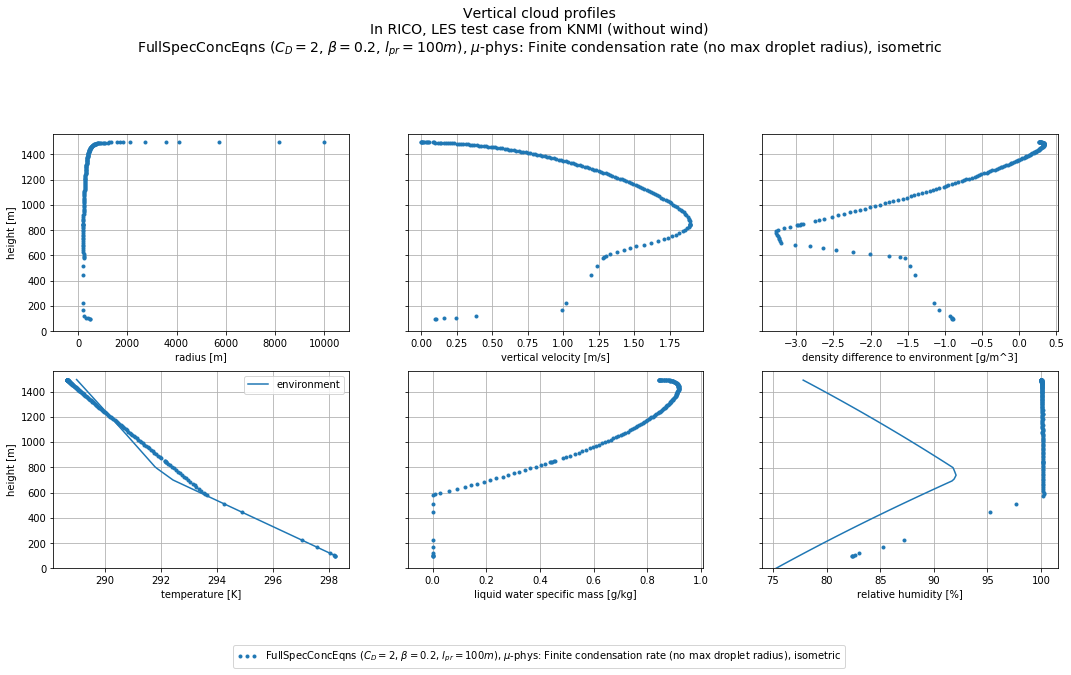

In [14]:
constants = reference_constants.default_constants
microphysics = microphysics_models.FiniteCondensationTimeMicrophysics()

cloud_model = parcel_models.FullThermodynamicsCloudEquations(
    environment=ambient_stratification, constants=constants, C_D=2.,
    microphysics=microphysics
)

initial_condition = Var.make_state(r=500.0, w=w0, T=T0, p=p0, q_v=qv0)
p1 = cloud_model.integrate(initial_condition, z_points)

fig = p1.plot(["r", "w", "d_rho", "T", "q_l", "RH",])